# Exploratory Data Analysis for CORD Dataset

In [1]:
# Import relevant libraries for EDA
import os
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import PIL
from PIL import Image, ImageFont, ImageDraw
from basic_image_eda import BasicImageEDA

In [2]:
# Define data directory path
train_data_dir = '../data/cord/train/image'
test_data_dir = '../data/cord/test/image'

In [3]:
# Plot and Get Summary Statistics for CORD dataset

# Define BasicImageEDA parameters
extensions = ['png', 'jpg', 'jpeg']
threads = 8
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0


found 800 images.
Using 8 threads. (max:8)



100%|██████████| 800/800 [00:22<00:00, 35.61it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  800

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  364
max height                               |  4224
mean height                              |  1573.30625
median height                            |  1296

min width                                |  204
max width                                |  3024
mean width                               |  997.07625
median width                             |  864

mean height/width ratio                  |  1.5779196927015362
median height/width ratio                |  1.5
recommended input size(by mean)          |  [1576 1000] (h x w, multiples of 8)
recommended input size(by mean)          |  [1568  992] (h x w, multiples of 16)
recommended input size(by mean)     

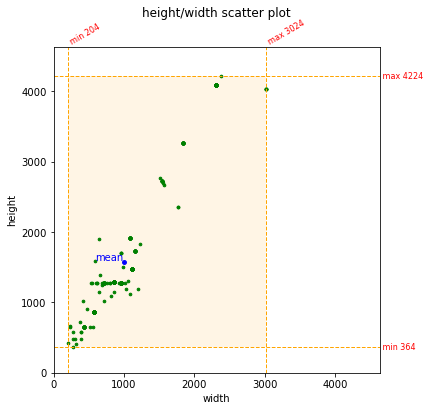

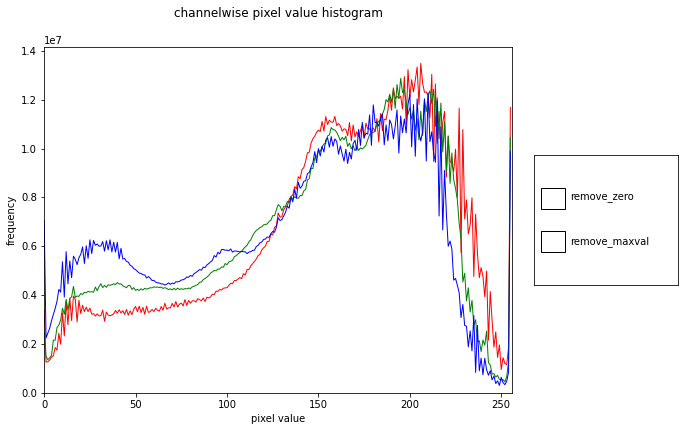

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['png'],
 'min_h': 364,
 'max_h': 4224,
 'mean_h': 1573.30625,
 'median_h': 1296,
 'min_w': 204,
 'max_w': 3024,
 'mean_w': 997.07625,
 'median_w': 864,
 'mean_hw_ratio': 1.5779196927015362,
 'median_hw_ratio': 1.5,
 'rec_hw_size_8': array([1576, 1000]),
 'rec_hw_size_16': array([1568,  992]),
 'rec_hw_size_32': array([1568,  992]),
 'mean': array([0.58472997, 0.56584513, 0.53379077], dtype=float32),
 'std': array([0.21574621, 0.22270028, 0.23194201], dtype=float32)}

In [4]:
# Plot Summary Statistics for Training Data
BasicImageEDA.explore(train_data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)


found 100 images.
Using 8 threads. (max:8)



100%|██████████| 100/100 [00:03<00:00, 25.58it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  100

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  336
max height                               |  4096
mean height                              |  1580.58
median height                            |  1296

min width                                |  228
max width                                |  3024
mean width                               |  1005.0
median width                             |  864

mean height/width ratio                  |  1.5727164179104476
median height/width ratio                |  1.5
recommended input size(by mean)          |  [1584 1008] (h x w, multiples of 8)
recommended input size(by mean)          |  [1584 1008] (h x w, multiples of 16)
recommended input size(by mean)          |

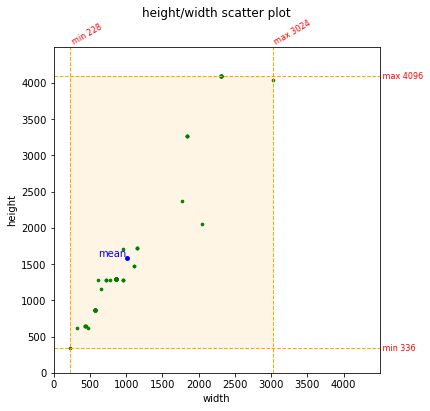

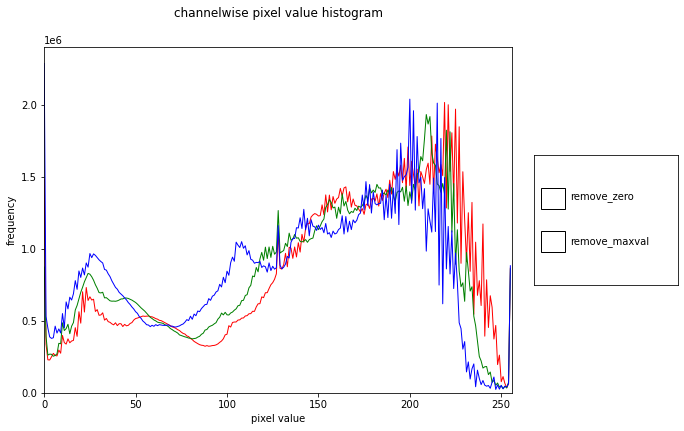

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['png'],
 'min_h': 336,
 'max_h': 4096,
 'mean_h': 1580.58,
 'median_h': 1296,
 'min_w': 228,
 'max_w': 3024,
 'mean_w': 1005.0,
 'median_w': 864,
 'mean_hw_ratio': 1.5727164179104476,
 'median_hw_ratio': 1.5,
 'rec_hw_size_8': array([1584, 1008]),
 'rec_hw_size_16': array([1584, 1008]),
 'rec_hw_size_32': array([1568,  992]),
 'mean': array([0.57138616, 0.5569269 , 0.5189437 ], dtype=float32),
 'std': array([0.23532794, 0.23440227, 0.24392349], dtype=float32)}

In [5]:
# Plot Summary Statistics for Testing Data
BasicImageEDA.explore(test_data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

## Visualizing Training Data

#### Obtaining a single sample from the training dataset

Image Name: receipt_00491.png
Image shape: (1296, 864, 3)


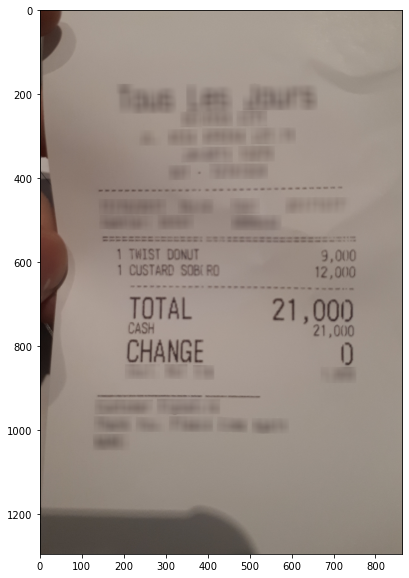

In [6]:
images = os.listdir(train_data_dir)
sample_img_name = images[0]
img = plt.imread(os.path.join(train_data_dir,images[0]))

# Visualizing the first image 
plt.figure(figsize=(20,10))
print(f"Image Name: {images[0]}")
print(f"Image shape: {img.shape}")   # Shape of Height x Width
plt.imshow(img, cmap="gray")

In [7]:
# Extract the Annotations for the Above Image and Inspecting the Annotations
img_annot_file = sample_img_name.split('.')[0] + '.json'

with open(os.path.join('../data/cord/train/json', img_annot_file), 'r') as file:
    print(file.read())

{
    "dontcare": [],
    "valid_line": [
        {
            "words": [
                {
                    "quad": {
                        "x2": 196,
                        "y3": 596,
                        "x3": 196,
                        "y4": 596,
                        "x1": 180,
                        "y1": 566,
                        "x4": 180,
                        "y2": 566
                    },
                    "is_key": 0,
                    "row_id": 2051003,
                    "text": "1"
                }
            ],
            "category": "menu.cnt",
            "group_id": 3
        },
        {
            "words": [
                {
                    "quad": {
                        "x2": 290,
                        "y3": 598,
                        "x3": 290,
                        "y4": 598,
                        "x1": 208,
                        "y1": 564,
                        "x4": 208,
                        "y2": 564
     

In [20]:
# Function to viz the annotation
def markup(image, annotations):
    ''' Draws the segmentation, bounding box, and label of each annotation
    '''
    draw = ImageDraw.Draw(image, 'RGBA')
    font = ImageFont.truetype("../fonts/dejavu-sans/DejaVuSans.ttf", 12)    
    
    for i in range(len(annotations["valid_line"])):
        if len(annotations['valid_line'][i]['words']) > 1:
            for j in range(len(annotations['valid_line'][i]['words'])):
                        # Draw bbox
                        draw.rectangle(
                            (annotations['valid_line'][i]['words'][j]['quad']['x1'],
                            annotations['valid_line'][i]['words'][j]['quad']['y1'],
                            annotations['valid_line'][i]['words'][j]['quad']['x2'],
                            annotations['valid_line'][i]['words'][j]['quad']['y3']),
                            outline=(0,255,0),
                            width=1
                        )
                                # Draw label
                        draw.text(
                            (annotations['valid_line'][i]['words'][j]['quad']['x1'],
                            annotations['valid_line'][i]['words'][j]['quad']['y1']-15),
                            text=annotations['valid_line'][i]['category'],
                            fill=(255,255,255,255),
                            font=font
                        )
        else:
            # Draw bbox
            draw.rectangle(
                (annotations['valid_line'][i]['words'][0]['quad']['x1'],
                annotations['valid_line'][i]['words'][0]['quad']['y1'],
                annotations['valid_line'][i]['words'][0]['quad']['x2'],
                annotations['valid_line'][i]['words'][0]['quad']['y3']),
                outline=(0,255,0),
                width=1
            )

            # Draw label
            draw.text(
                (annotations['valid_line'][i]['words'][0]['quad']['x1'],
                annotations['valid_line'][i]['words'][0]['quad']['y1']-15),
                text=annotations['valid_line'][i]['category'],
                fill=(255,255,255,255),
                font=font
            )
        
    return np.array(image)

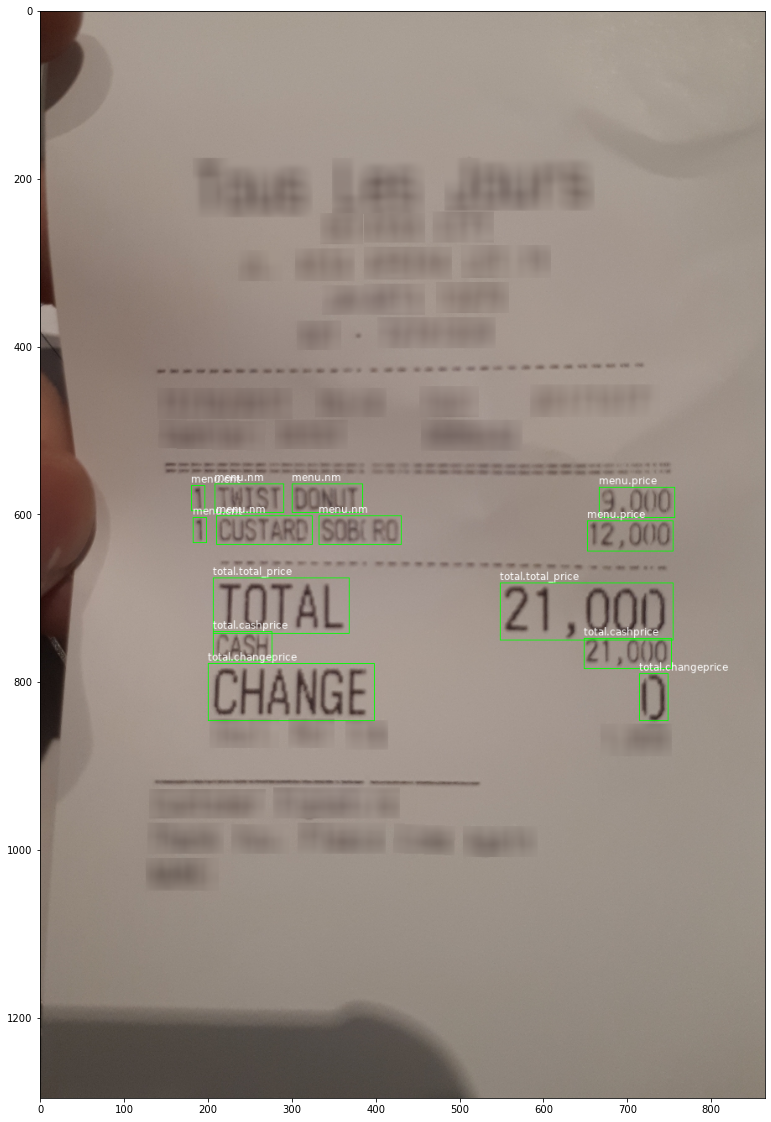

In [21]:
import json

sample_img = Image.open(os.path.join(train_data_dir,images[0]))

with open(os.path.join('../data/cord/train/json', img_annot_file), 'r') as file:
    annotations = json.loads(file.read())
    img = markup(sample_img, annotations)

plt.figure(figsize=(40,20))
plt.imshow(img)
    

In [22]:
with open(os.path.join('../data/cord/train/json', img_annot_file), 'r') as file:
    annotations = json.loads(file.read())
    print(f'Image Size: {annotations["meta"]["image_size"]}')    # Gets Image Size Metadata
    print(f'Number of Annotations: {len(annotations["valid_line"])}')   # Get Number of Annotations

    for i in range(len(annotations["valid_line"])):
        print(annotations['valid_line'][i]['words'][0]['quad'])
        print(annotations['valid_line'][i]['category'])

Image Size: {'width': 864, 'height': 1296}
Number of Annotations: 9
{'x2': 196, 'y3': 596, 'x3': 196, 'y4': 596, 'x1': 180, 'y1': 566, 'x4': 180, 'y2': 566}
menu.cnt
{'x2': 290, 'y3': 598, 'x3': 290, 'y4': 598, 'x1': 208, 'y1': 564, 'x4': 208, 'y2': 564}
menu.nm
{'x2': 756, 'y3': 604, 'x3': 756, 'y4': 604, 'x1': 666, 'y1': 568, 'x4': 666, 'y2': 568}
menu.price
{'x2': 198, 'y3': 634, 'x3': 198, 'y4': 634, 'x1': 182, 'y1': 604, 'x4': 182, 'y2': 604}
menu.cnt
{'x2': 324, 'y3': 636, 'x3': 324, 'y4': 636, 'x1': 210, 'y1': 602, 'x4': 210, 'y2': 602}
menu.nm
{'x2': 754, 'y3': 644, 'x3': 754, 'y4': 644, 'x1': 652, 'y1': 608, 'x4': 652, 'y2': 608}
menu.price
{'x2': 368, 'y3': 742, 'x3': 368, 'y4': 742, 'x1': 206, 'y1': 676, 'x4': 206, 'y2': 676}
total.total_price
{'x2': 276, 'y3': 774, 'x3': 276, 'y4': 774, 'x1': 206, 'y1': 740, 'x4': 206, 'y2': 740}
total.cashprice
{'x2': 398, 'y3': 846, 'x3': 398, 'y4': 846, 'x1': 200, 'y1': 778, 'x4': 200, 'y2': 778}
total.changeprice


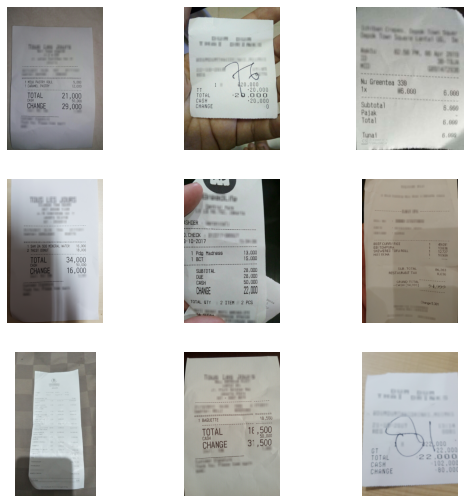

In [18]:
# Plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3

for i in range(1, rows * cols + 1):
    random_img = np.random.choice(images)
    img = plt.imread(os.path.join(train_data_dir,random_img))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap="gray")
    plt.axis(False)

## Visualizing Testing Data

Image Name: receipt_00081.png
Image shape: (4096, 2304, 3)


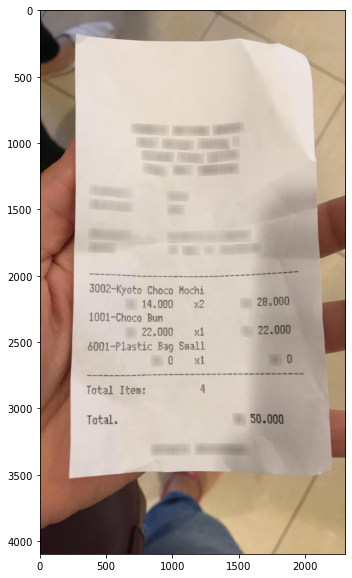

In [19]:
images = os.listdir(test_data_dir)
img = plt.imread(os.path.join(test_data_dir,images[0]))

# Visualizing the first image 
plt.figure(figsize=(20,10))
print(f"Image Name: {images[0]}")
print(f"Image shape: {img.shape}")   # Shape of Height x Width
plt.imshow(img, cmap="gray")

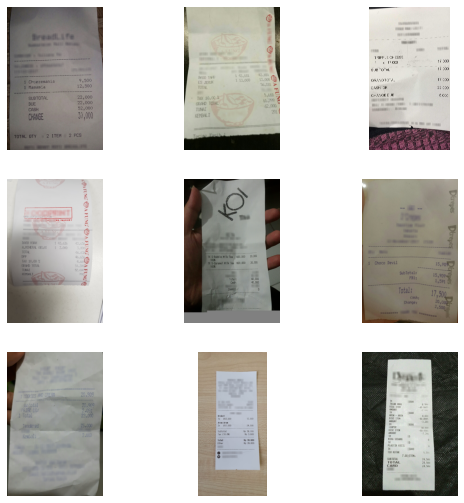

In [20]:
# Plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3

for i in range(1, rows * cols + 1):
    random_img = np.random.choice(images)
    img = plt.imread(os.path.join(test_data_dir,random_img))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap="gray")
    plt.axis(False)